# Проект для регионального банка по анализу оттока клиентов.

**Цель исследования:** Проанализировать клиентов регионального банка и выделить сегменты клиентов,
которые склонны уходить из банка.

**Описание данных:** Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. Данные предоставлены Яндекс.Практикум.

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга, оценка уровня платежеспособности клиента от 0-1000 (чем выше,тем лучше )
- city — город,
- gender — пол,
- age — возраст,только совершеннолетние,
- equity — количество баллов собственности,показатель используется в анализе оттока клиентов банка, от 0-9 (0-нет собственности) категориальный признак,
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,0 - нет движения денежных средств от 3-х мес,
- EST_SALARY — оценочный доход клиента, любые поступления считая пособия,
- сhurn — признак оттока, 1-клиент ушел. Данные по этому клиенту перед закрытием договора.

**Ход исследования(декомпозиция)**

1. [Выгрузим данные и изучим их](#start)
2. [Проведем предобработку:](#preprocessing)
- [Изменим названия столбцов согласно принятому стилю;](#names)
- [Выведем общую информацию о таблице;](#information)
- [Исследуем содержание столбцов на соответствие типов данных и изменим тип, где необходимо;](#type)
- [Изучим пропуски значений, примем решение оставить, удалить либо заменить на подходящее значение;](#gaps)
- [Проверим на наличие явных дубликатов и удалим их при наличии.](#duplicates)
3. [Проведем исследовательский анализ данных:](#analysis)
- [Изучим содержание колонок, проверим наличие выбросов или аномальных значений;](#content)
- [Примем решение об удалении таких значений либо замене на определенное значение;](#outliers)
- [Строим нормализованные гистограммы по каждому параметру для ушедших и оставшихся клиентов;](#hist)
- [Выделяем интервалы значений, являющиеся признаком большего оттока;](#characteristic)
- [Строим матрицу корреляции, где отображена доля ушедших клиентов в зависимости от каждого параметра таблицы;](#corr)
- [Выделяем сегменты клиентов по двум или трем отточным признакам и формируем компактные высокоотточные сегменты;](#segments)
- [Сравним портреты клиентов, склонных к уходу.](#portrait)
4. [Проведем статистическое исследование:](#statistic)
- [Сформулируем и проверим гипотезы влияния конкретных факторов на отток клиентов методом статистического анализа;](#hypotheses)
- [Сделаем вывод о том, какие показатели оказывают статистически значимое влияние на отток клиентов.](#stat)
5. [Общий вывод:](#intermediate)
- [Объединим признаки отточности и сформируем сегменты;](#signs)
- [Дадим рекомендации отделу маркетинга для уменьшения оттока клиентов.](#recomendation)
6. [Ссылка на презентацию.](#presentation)

## Вызрузим данные и изучим их.  
<a id="start"></a>

In [77]:
import pandas as pd  # Библиотека для работы с табличными данными (DataFrame)
import matplotlib.pyplot as plt  # Библиотека для визуализации данных (графики, диаграммы)
import seaborn as sns  # Библиотека для стильной статистической визуализации
import scipy.stats as stats  # Библиотека для проведения статистических тестов
import numpy as np  # Библиотека для работы с числовыми массивами и математическими операциями

pd.options.display.float_format = '{:,.2f}'.format  # Настройка отображения чисел с двумя знаками после запятой

In [78]:
# Установка стиля
sns.set(style="whitegrid")

# Установка палет
sns.set(palette="Dark2")


In [79]:
#выгрузим данные
data = pd.read_csv('bank_scrooge.csv')

In [80]:
#изучим данные
data.head(3)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0


*Выгрузили данные и распечатали часть таблицы. Мы видим, что не все названия столбцов указаны в едином стиле, есть днные категориальные и количественные. Имеются пропуски значений.*

## Проведем предобработку:
<a id="preprocessing"></a>

**Изменим названия столбцов согласно принятому стилю.**
<a id="names"></a>

In [81]:
#приведем к нижнему регистру
data.columns = data.columns.str.lower()
#изменим названия столбов
data = data.rename(columns={'userid': 'user_id'})

data.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0


**Выведем общую информацию о таблице.**
<a id="information"></a>

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Исследуем содержание столбцов на соответствие типов данных и изменим тип, где необходимо.**
<a id="type"></a>

*Типы данных соответствуют значениям, изменять не будем.*

**Изучим пропуски значений, примем решение оставить, удалить либо заменить на подходящее значение.**
<a id="gaps"></a>

In [83]:
#количество пропущенных значений в каждом столбце
data.isna().sum()

,0
user_id,0
score,0
city,0
gender,0
age,26
equity,0
balance,2295
products,0
credit_card,0
last_activity,0


In [84]:
#доля пропущенны значений от общего количества строк
(data.isna().sum()/len(data)).round(4) * 100

,0
user_id,0.00
score,0.00
city,0.00
gender,0.00
age,0.26
equity,0.00
balance,22.95
products,0.00
credit_card,0.00
last_activity,0.00


*Обнаружили пропуски в данных с возрастом и с балансом на счете клиента. Заменить значения не получится, так как вычислить нужное в каждем случае невозможно. Удалять их не будем, так как в колонке с возрастом пропусков менее 1%, а с балансом наоборот слишком много и это повлияет на исследование.*

**Проверим на наличие явных дубликатов и удалим их при наличии.**
<a id="duplicates"></a>

In [85]:
data.duplicated().sum()

np.int64(0)

*Дубликатов в таблице не обнаружено*

*Мы провели предобработку данных, изменили названия столбцов, выяснили типы данных, нашли их соответвующим значениям. Обнаружили пропуски, заменять их не стали. Дубликатов нет.*

## Проведем исследовательский анализ данных:
<a id="analysis"></a>

**Изучим содержание колонок, проверим наличие выбросов или аномальных значений.**
<a id="content"></a>

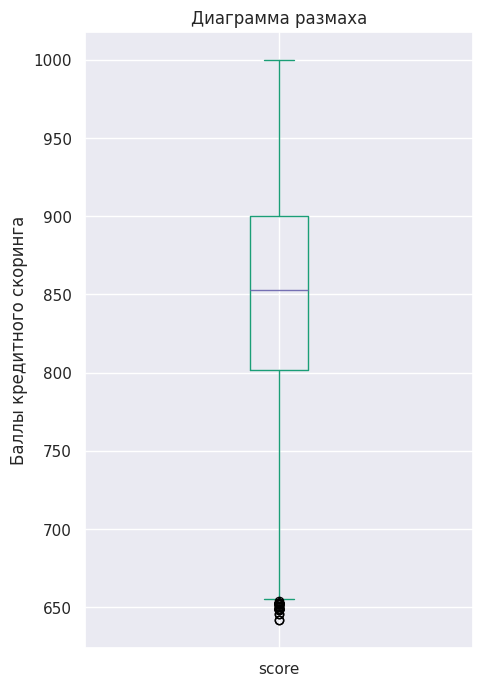

,score
count,"10,000.00"
mean,848.70
std,65.45
min,642.00
25%,802.00
50%,853.00
75%,900.00
max,"1,000.00"


In [86]:
#изучим содержание колонки score
data.score.plot.box(figsize=(5, 8))

plt.title('Диаграмма размаха')
plt.ylabel('Баллы кредитного скоринга')
plt.show()

data.score.describe()

*Мы видим, что баллы кредитного скоринга принимают значения от 0 до 1000, среднее значение 853, а минимальное 642. Значения меньше 650 уже лежат в области выбросов.*

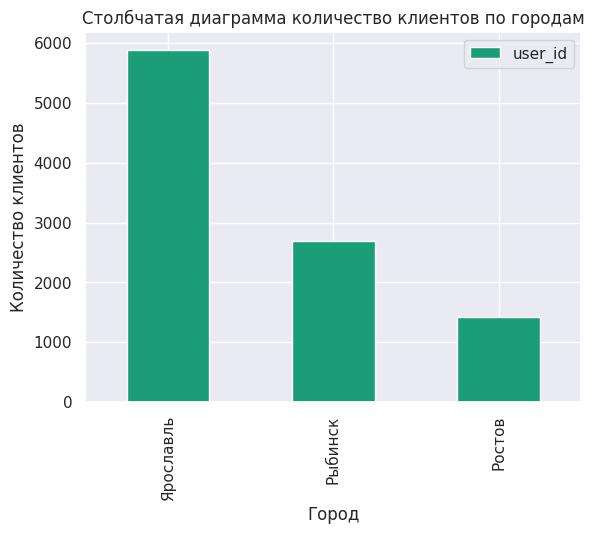

In [87]:
#изучим содержание колонки city
data_city = data.groupby('city')['user_id'].nunique().reset_index().sort_values(by= 'user_id', ascending=False)

data_city.plot.bar(x='city', y='user_id')
plt.title('Столбчатая диаграмма количество клиентов по городам')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.show()

*Больше всего клиентов в городе Ярославль, меньше всего в Ростове, около 1200.*

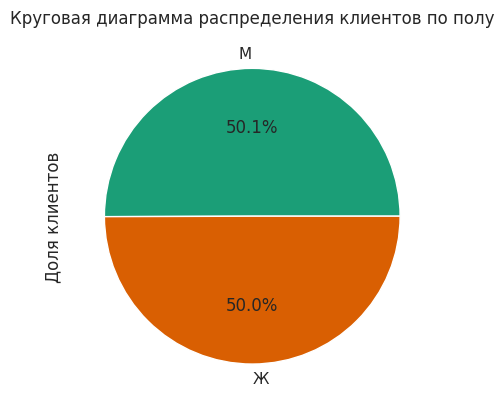

In [88]:
#изучим содержание колонки gender
data_gender = data.groupby('gender')['user_id'].count().reset_index().sort_values(by= 'user_id', ascending=False)
data_gender
data_gender['user_id'].plot.pie(labels=data_gender['gender'], autopct='%1.1f%%')
plt.title('Круговая диаграмма распределения клиентов по полу')
plt.ylabel('Доля клиентов')
plt.show()

*Клиенты распределены равномерно по полу.*

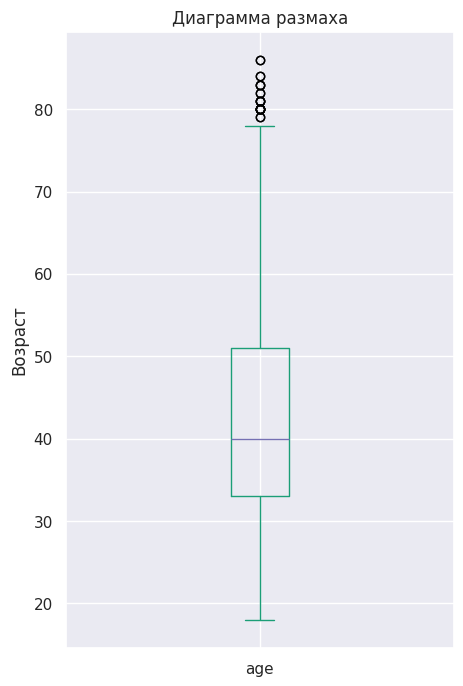

,age
count,"9,974.00"
mean,42.73
std,12.18
min,18.00
25%,33.00
50%,40.00
75%,51.00
max,86.00


In [89]:
#изучим содержание колонки age

data.age.plot.box(figsize=(5, 8))

plt.title('Диаграмма размаха')
plt.ylabel('Возраст')
plt.show()

data.age.describe()

*Клиенты банка расперделены по возрасту от 18 до 86 лет, это соответствует реальным значениям. Средний возраст клиентов 40 лет.*

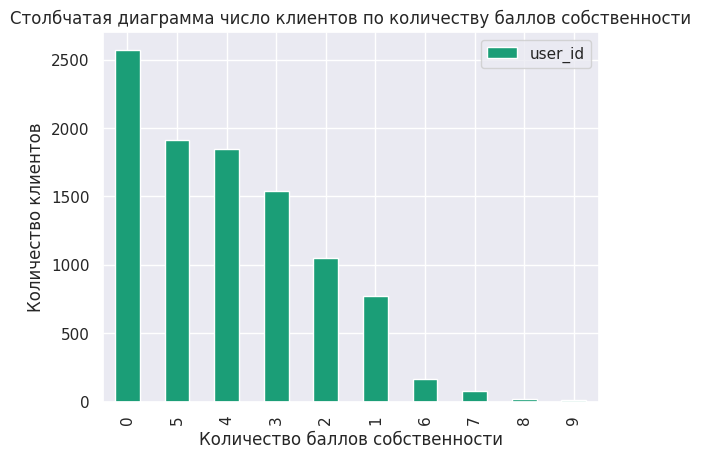

In [90]:
#изучим содержание колонки equity

data_equity = data.groupby('equity')['user_id'].nunique().reset_index().sort_values(by= 'user_id', ascending=False)

data_equity.plot.bar(x='equity', y='user_id')
plt.title('Столбчатая диаграмма число клиентов по количеству баллов собственности')
plt.xlabel('Количество баллов собственности')
plt.ylabel('Количество клиентов')
plt.show()


*Больше всего клиентов банка в категории без собственности. Самое же малое количество клиентов с максимальным количеством баллов собственности 8 и 9.*

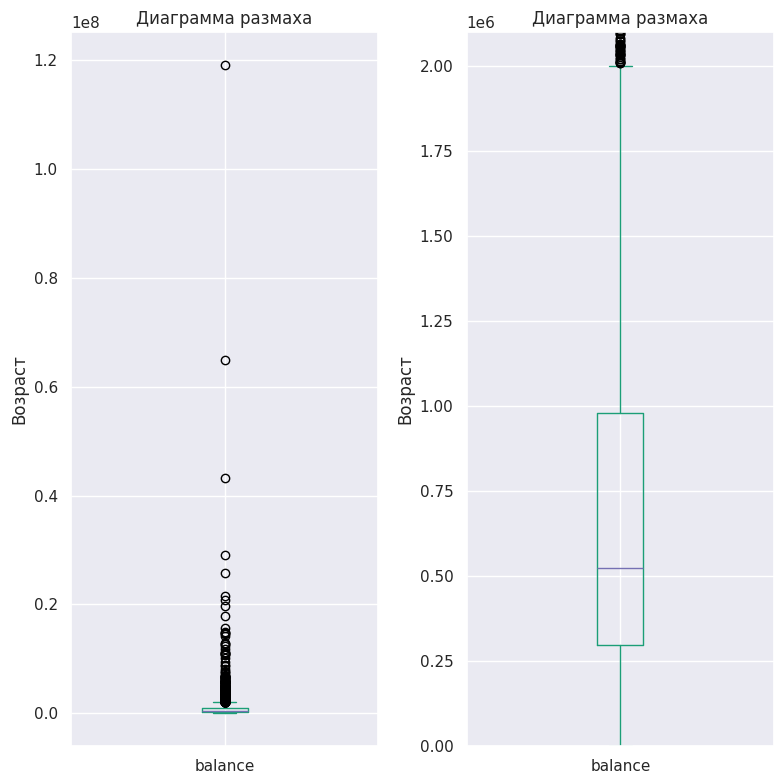

,balance
count,"7,705.00"
mean,"827,794.31"
std,"1,980,614.15"
min,0.00
25%,"295,554.16"
50%,"524,272.20"
75%,"980,705.85"
max,"119,113,552.01"


In [91]:
#изучим содержание колонки balance

fig, axes = plt.subplots(1, 2, figsize=(8, 8))  # Создаем сетку из 1 строки и 2 столбцов

# Первый график
data.balance.plot.box(ax=axes[0])
axes[0].set_title('Диаграмма размаха')
axes[0].set_ylabel('Возраст')

# Второй график
data.balance.plot.box(ax=axes[1])
axes[1].set_title('Диаграмма размаха')
axes[1].set_ylabel('Возраст')
axes[1].set_ylim(0, 2100000)

plt.tight_layout()  # Чтобы графики не перекрывали друг друга
plt.show()

data.balance.describe()

*Баланс на счете имеет большой разброс значений от 0 до 119 млн. Тогда как среднее значение примерно 500000. Мы нарисовали два графика, чтобы внимательно рассмотреть межквартильные значения. Слишком большие суммы на счете редкость, но не будем считать это выбросами и оставим этих клиентов для анализа.*

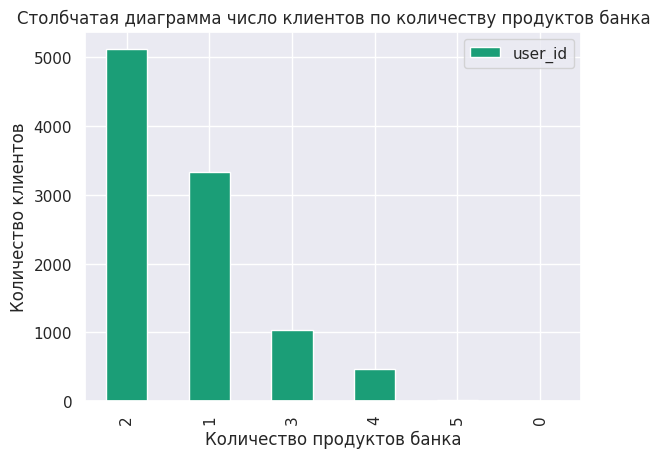

In [92]:
#изучим содержание колонки products

data_products = data.groupby('products')['user_id'].nunique().reset_index().sort_values(by= 'user_id', ascending=False)

data_products.plot.bar(x='products', y='user_id')
plt.title('Столбчатая диаграмма число клиентов по количеству продуктов банка')
plt.xlabel('Количество продуктов банка')
plt.ylabel('Количество клиентов')
plt.show()


*Клиенты банка распределены по 5 категориям по количеству продуктов банка, больше всего клиентов в категории с 2 продуктами, тогда как 0 и 5 почти ни у кого не встречается.*

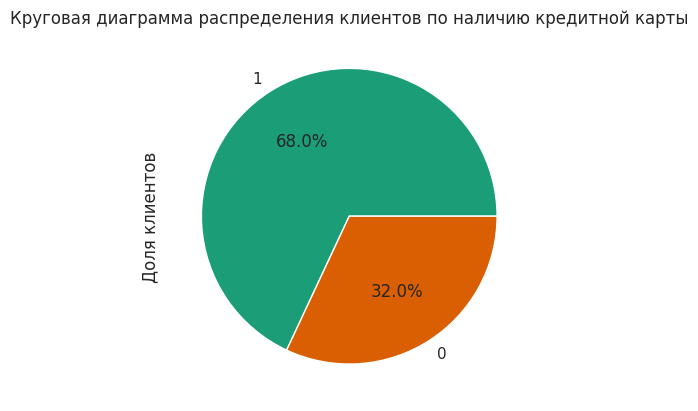

In [93]:
#изучим содержание колонки credit_card

data_card = data.groupby('credit_card')['user_id'].count().reset_index().sort_values(by= 'user_id', ascending=False)

data_card['user_id'].plot.pie(labels=data_card['credit_card'], autopct='%1.1f%%')
plt.title('Круговая диаграмма распределения клиентов по наличию кредитной карты')
plt.ylabel('Доля клиентов')
plt.show()


*Клиентов с кредитной картой значительно больше.*

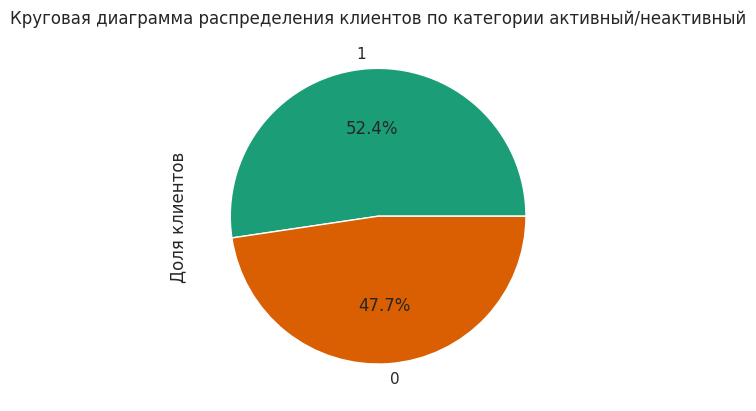

In [94]:
#изучим содержание колонки last_activity

data_activity = data.groupby('last_activity')['user_id'].count().reset_index().sort_values(by= 'user_id', ascending=False)

data_activity['user_id'].plot.pie(labels=data_activity['last_activity'], autopct='%1.1f%%')
plt.title('Круговая диаграмма распределения клиентов по категории активный/неактивный')
plt.ylabel('Доля клиентов')
plt.show()

*Из диаграммы следует, что почти половина клиентов длительное время не имеет движения денежных средств по своим счетам.*

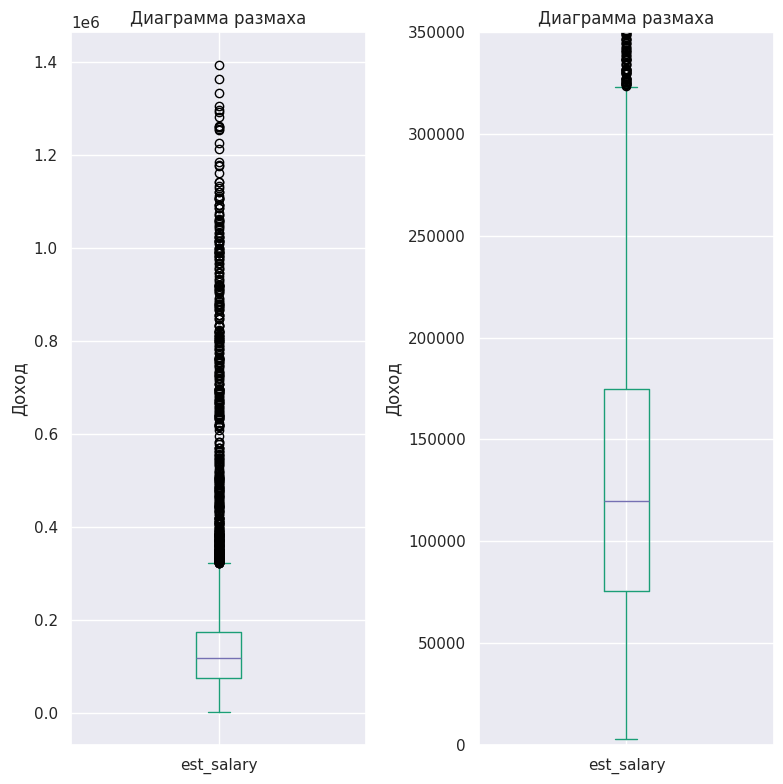

,est_salary
count,"10,000.00"
mean,"147,866.89"
std,"139,388.51"
min,"2,546.30"
25%,"75,251.90"
50%,"119,658.10"
75%,"174,500.54"
max,"1,395,064.45"


In [95]:
#изучим содержание колонки est_salary
fig, axes = plt.subplots(1, 2, figsize=(8, 8))  # Создаем сетку из 1 строки и 2 столбцов

# Первый график
data.est_salary.plot.box(ax=axes[0])
axes[0].set_title('Диаграмма размаха')
axes[0].set_ylabel('Доход')

# Второй график
data.est_salary.plot.box(ax=axes[1])
axes[1].set_title('Диаграмма размаха')
axes[1].set_ylabel('Доход')
axes[1].set_ylim(0, 350000)

plt.tight_layout()  # Чтобы графики не перекрывали друг друга
plt.show()
data.est_salary.describe()


*Размах в значених с доходом достаточно большой. Минимальное значение 2546, а максимальное молее 1 млн. Среднее значение дохода составляет 120000. Мы нарисовали два распределения рядом, чтобы рассмотреть межквартильный размах.*

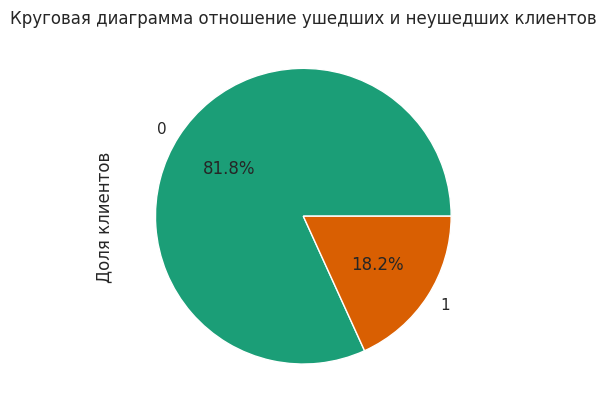

In [96]:
#изучим содержание колонки churn
data_churn = data.groupby('churn')['user_id'].count().reset_index().sort_values(by= 'user_id', ascending=False)

data_churn['user_id'].plot.pie(labels=data_churn['churn'], autopct='%1.1f%%')
plt.title('Круговая диаграмма отношение ушедших и неушедших клиентов')
plt.ylabel('Доля клиентов')
plt.show()

*В банке на данный момент 18.2% клиентов закрыли свои договоры.*

Примем решение об удалении таких значений либо замене на определенное значение
<a id="outliers"></a>


*Мы нашли выбросы в значениях баллов кредитного скоринга, распределения баланса на счете и доходе. Удалять эти данные мы не будем, чтобы не исказить разультаты дальнейшего исследования.*

 **Строим нормализованные гистограммы по каждому параметру для ушедших и оставшихся клиентов.**
 <a id="hist"></a>

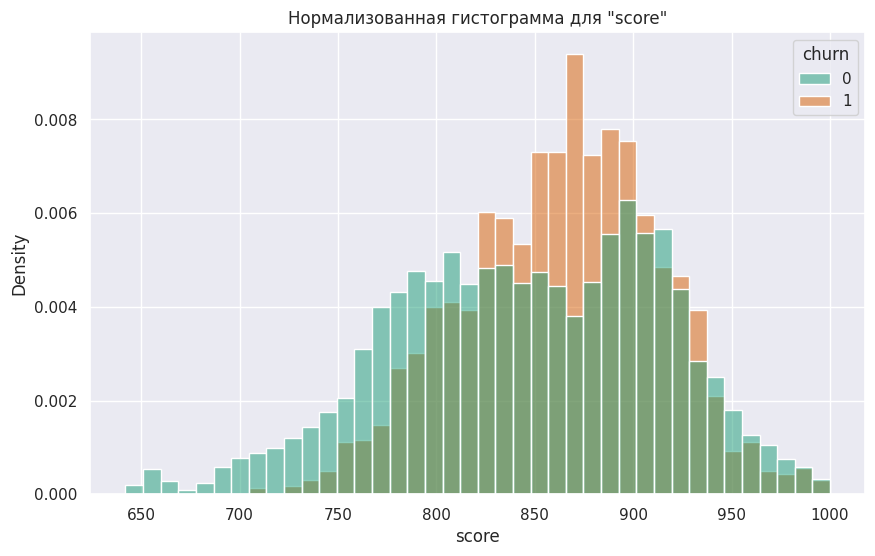

In [97]:
#создадим функцию для построения однотипных гистограмм
def plot_normalized_histogram(data, column, hue='churn', figsize=(10, 6)):

    fig, ax = plt.subplots(figsize=figsize)

    sns.histplot(
        data=data,
        x=column,
        hue=hue, # цветовая группировка по колонке churn
        stat='density', # нормализация
        common_norm=False, # отключение общей нормализации между группами
        ax=ax
    )

    ax.set_title(f'Нормализованная гистограмма для "{column}"')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

    plt.show()

#создадаим нормализованную гистограмму для значений score
plot_normalized_histogram(data, 'score')


*Для клиентов склонных к закрытию договора показатель score лежит в интервале от 830 до 910 и с 930 до 940.*

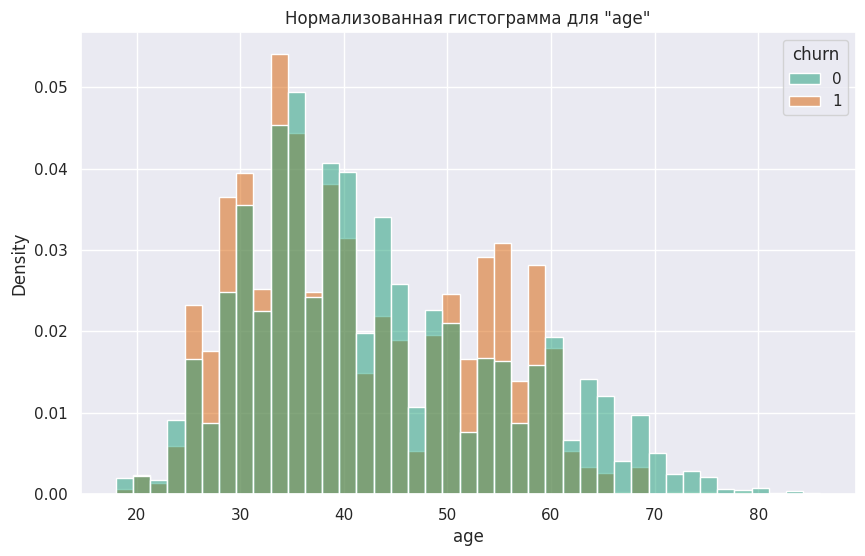

In [98]:
#создадаим нормализованную гистограмму для значений age
plot_normalized_histogram(data, 'age')

*Для клиентов склонных к закрытию договора значение age лежит в интервале от 26 до 34 и от 50 до 60 лет.*

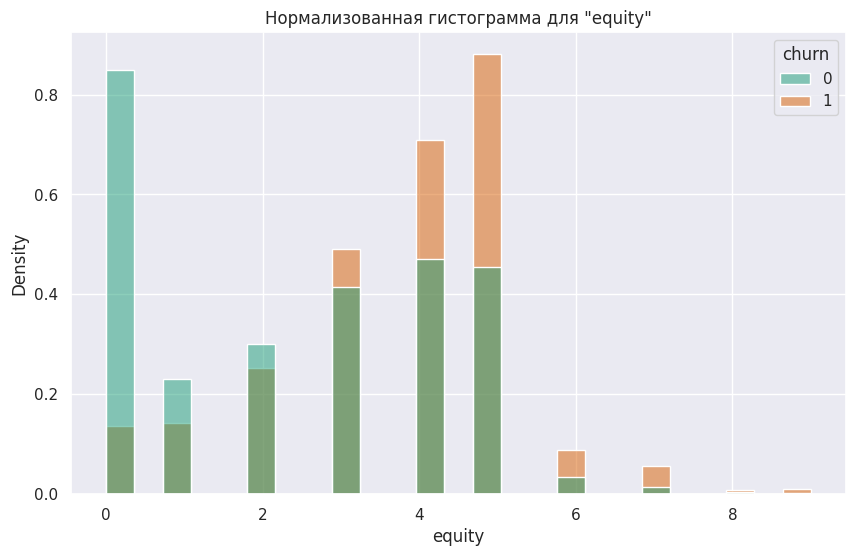

In [99]:
#создадаим нормализованную гистограмму для значений equity
plot_normalized_histogram(data, 'equity')

*Для клиентов склонных к закрытию договора значение equity лежит в интервале от 3 до 7.*

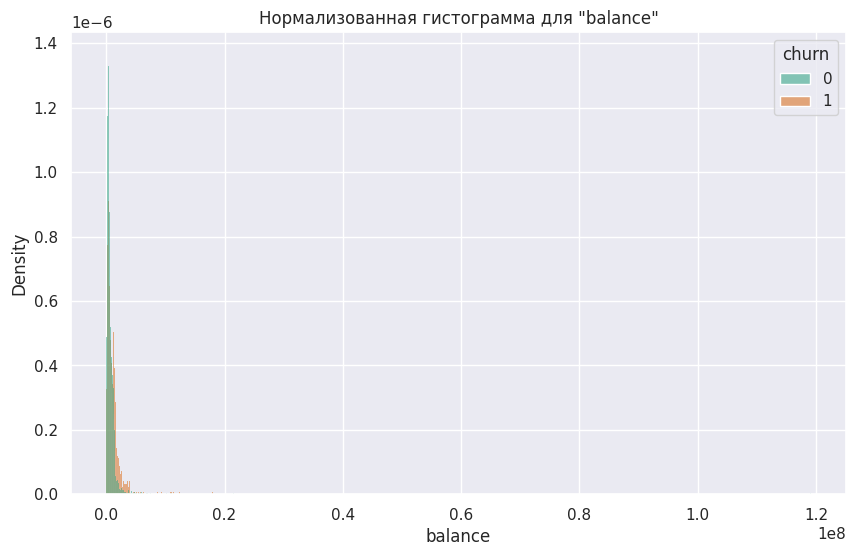

In [100]:
#создадаим нормализованную гистограмму для значений balance
plot_normalized_histogram(data, 'balance')

На диаграмме невозможно разобрать значения баланса, отрисуем гистограмму с установленными лимитами.

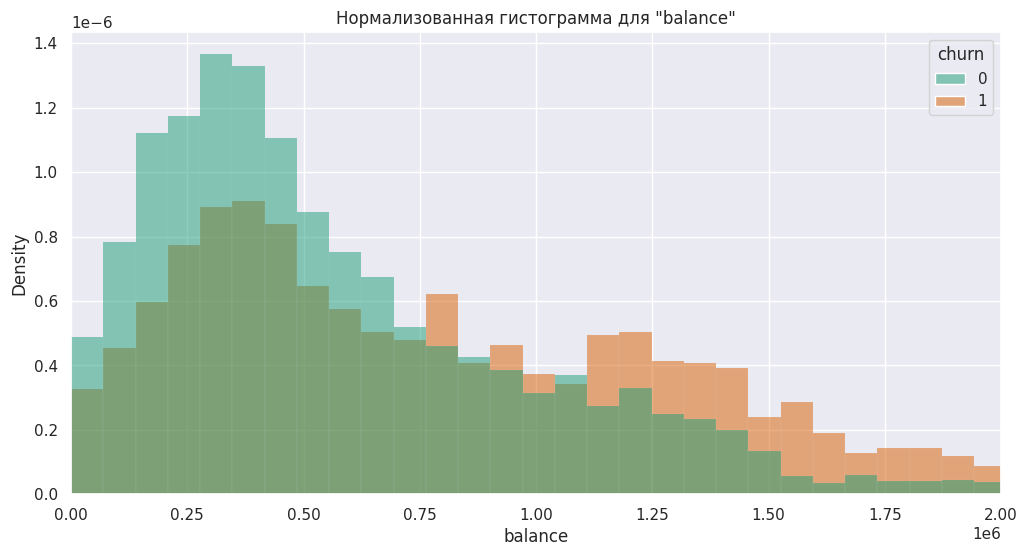

In [101]:
#создадаим нормализованную гистограмму для значений balance с лимитом по балансу
fig, ax = plt.subplots(figsize=(12, 6))

# Построение гистограммы
sns.histplot(
    data=data,
    hue='churn',  # Цветовая группировка по колонке churn
    x='balance',
    stat='density',  # Нормализация
    common_norm=False,  # Отключение общей нормализации между группами
    ax=ax
)

# Настройка подписей
ax.set_title('Нормализованная гистограмма для "balance"')
ax.set_xlabel('balance')
ax.set_ylabel('Density')
ax.set_xlim(0, 2000000)

# Показ графика
plt.show()

*Для клиентов склонных к закрытию договора значение balance лежит в интервале от 750000 до 850000 и от 900000 до 1050000, от 1100000 до 2000000. С большими значениями будут немногочисленные группы.*

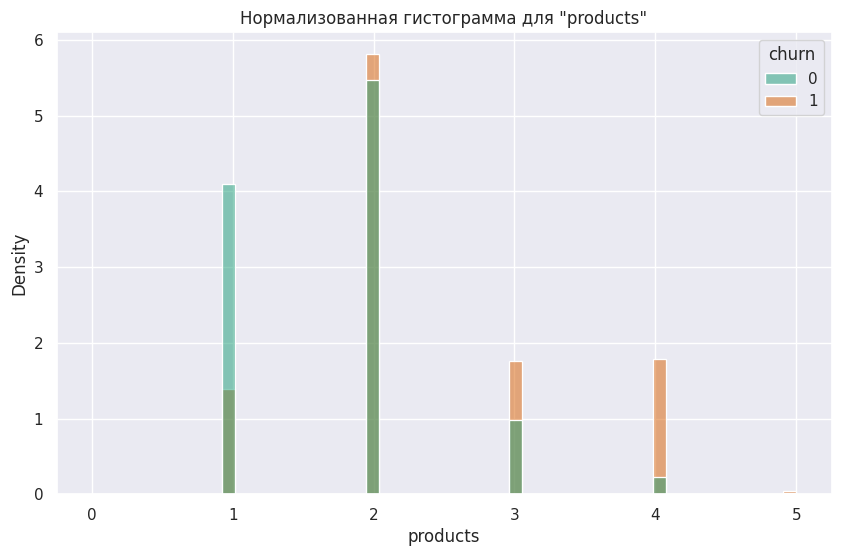

In [102]:
#создадаим нормализованную гистограмму для значений products
plot_normalized_histogram(data, 'products')

*Для клиентов склонных к закрытию договора значение products лежит в интервале от 2 до 4.*

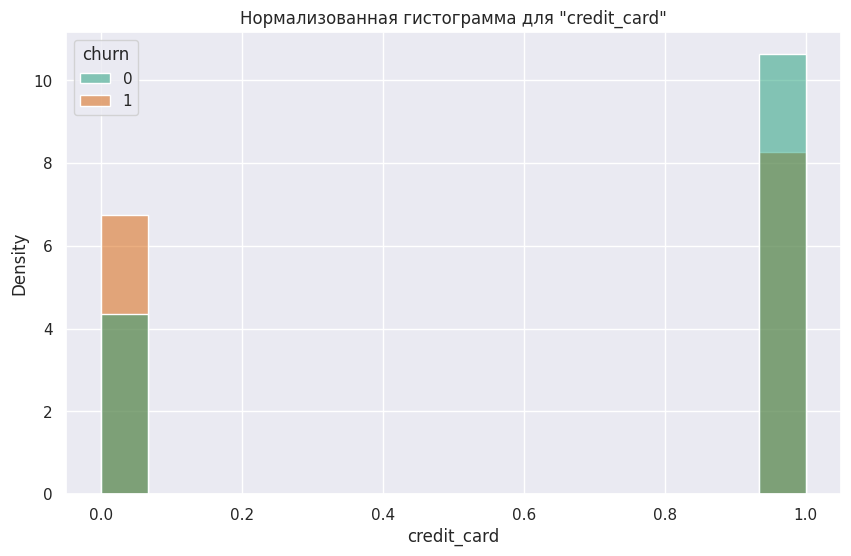

In [103]:
#создадаим нормализованную гистограмму для значений credit_card
plot_normalized_histogram(data, 'credit_card')

*Для клиентов склонных к закрытию договора характерно отсутствие кредитной карты.*

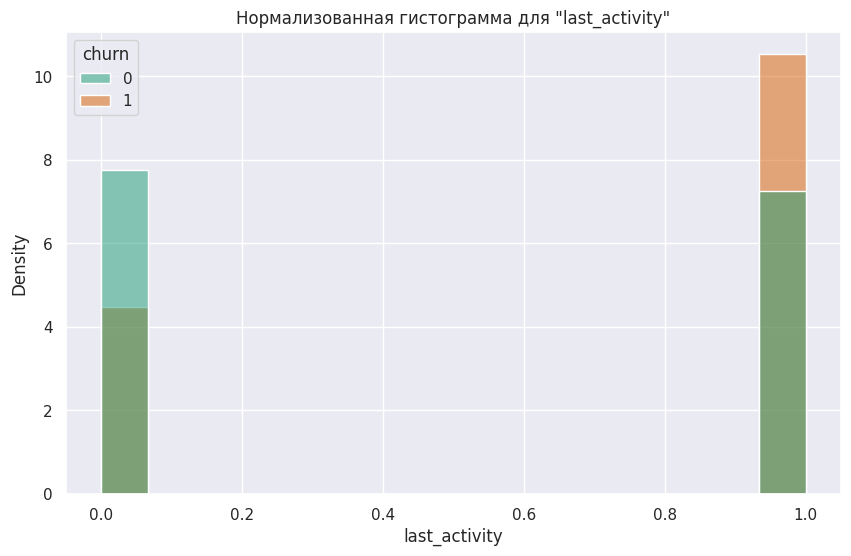

In [104]:
#создадаим нормализованную гистограмму для значений last_activity
plot_normalized_histogram(data, 'last_activity')

*Закрывают договор чаще активные клиенты.*

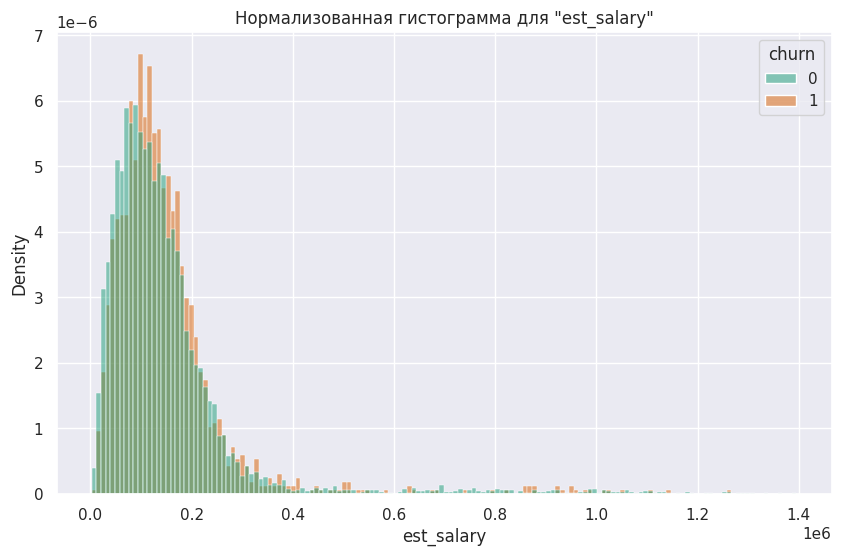

In [105]:
#создадаим нормализованную гистограмму для значений est_salary
plot_normalized_histogram(data, 'est_salary')

На диаграмме невозможно разобрать значения заработной платы, отрисуем гистограмму с установленными лимитами.

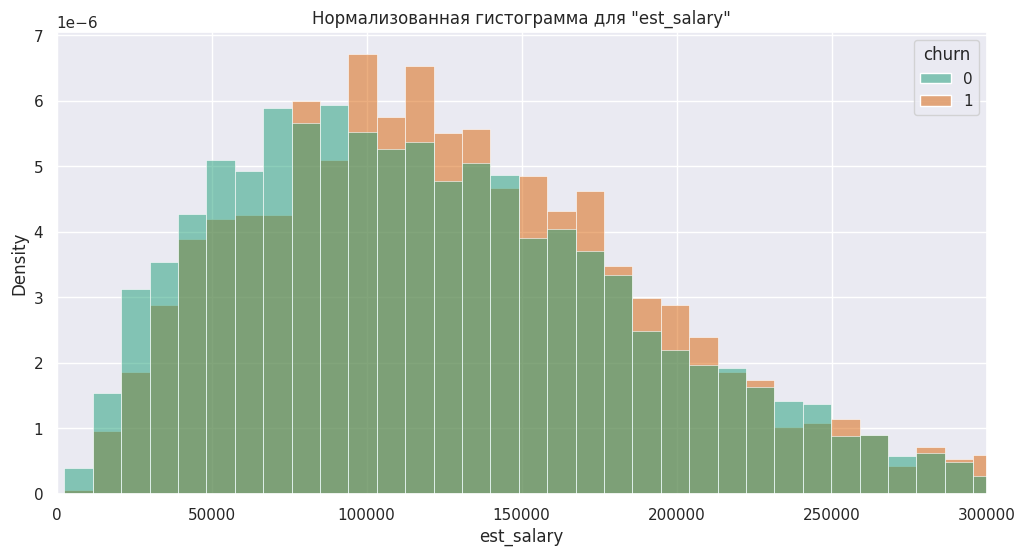

In [106]:
#создадаим нормализованную гистограмму для значений est_salary с лимитом по зарплате
fig, ax = plt.subplots(figsize=(12, 6))

# Построение гистограммы
sns.histplot(
    data=data,
    hue='churn',  # Цветовая группировка по колонке churn
    x='est_salary',
    stat='density',  # Нормализация
    common_norm=False,  # Отключение общей нормализации между группами
    ax=ax
)

# Настройка подписей
ax.set_title('Нормализованная гистограмма для "est_salary"')
ax.set_xlabel('est_salary')
ax.set_ylabel('Density')
ax.set_xlim(0, 300000)

# Показ графика
plt.show()

*Для клиентов склонных к закрытию договора значение est_salary лежит в интервале от 75000 до 85000 и от 90000 до 210000. С большими значениями будут немногочисленные группы.*

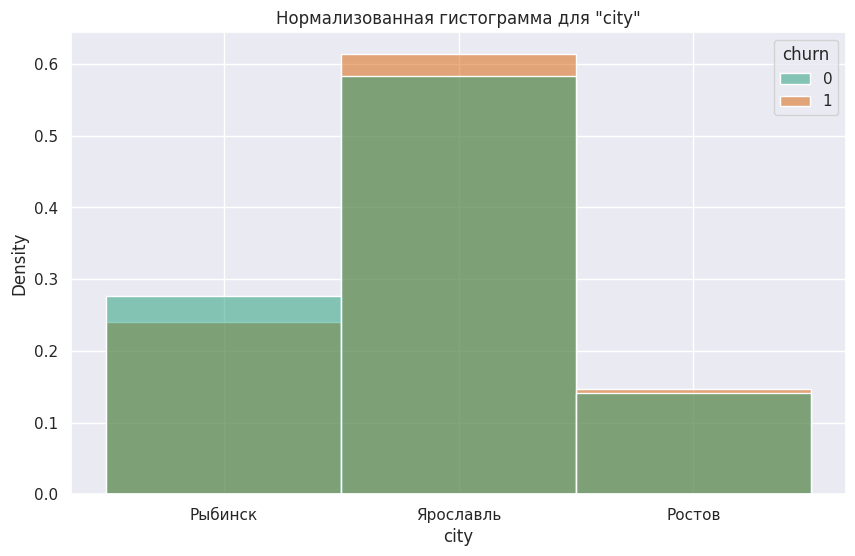

In [107]:
#создадаим нормализованную гистограмму для значений city
fig, ax = plt.subplots(figsize=(10, 6))

# Построение гистограммы
sns.histplot(
    data=data,
    hue='churn',  # Цветовая группировка по колонке churn
    x='city',
    stat='density',  # Нормализация
    common_norm=False,  # Отключение общей нормализации между группами
    ax=ax,
    discrete=True #для данных типа object

)

# Настройка подписей
ax.set_title('Нормализованная гистограмма для "city"')
ax.set_xlabel('city')
ax.set_ylabel('Density')

# Показ графика
plt.show()

*Клиенты из Ярославля и Ростова чаще закрывают договор.*

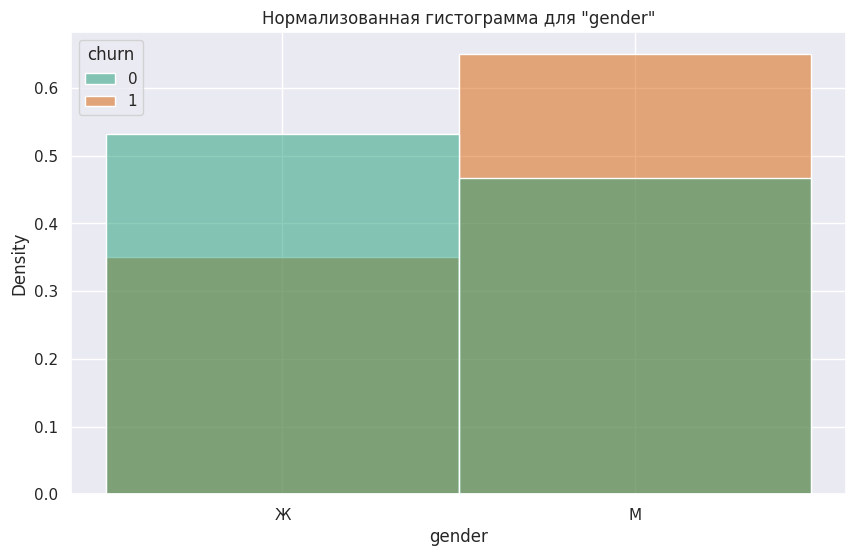

In [108]:
#создадаим нормализованную гистограмму для значений gender
fig, ax = plt.subplots(figsize=(10, 6))

# Построение гистограммы
sns.histplot(
    data=data,
    hue='churn',  # Цветовая группировка по колонке churn
    x='gender',
    stat='density',  # Нормализация
    common_norm=False,  # Отключение общей нормализации между группами
    ax=ax,
    discrete=True

)

# Настройка подписей
ax.set_title('Нормализованная гистограмма для "gender"')
ax.set_xlabel('gender')
ax.set_ylabel('Density')

# Показ графика
plt.show()

*Закрывают договор с банком чаще всего мужчины.*

**Выделяем интервалы значений, являющиеся признаком большего оттока.**
<a id="characteristic"></a>

In [109]:
#интервалы значений для score
score_churn_1min = 830
score_churn_1max = 910
score_churn_2min = 930
score_churn_2max = 940

#интервалы значений для city

city_churn_1 = "Ярославль"
city_churn_2 = "Ростов"

#интервалы значений для gender

gender_churn_1 = "М"

#интервалы значений для age
age_churn_1min = 26
age_churn_1max = 34
age_churn_2min = 50
age_churn_2max = 60

#интервалы значений для equity
equity_churn_1min = 3
equity_churn_1max = 7

#интервалы значений для balance
balance_churn_1min = 750000
balance_churn_1max = 850000
balance_churn_2min = 900000
balance_churn_2max = 1050000
balance_churn_3min = 1100000
balance_churn_3max = 2000000


#интервалы значений для products
products_churn_1min = 2
products_churn_1max = 4

#интервалы значений для credit_card
card_churn_1 = 0

#интервалы значений для last_activity
activity_churn_1 = 1


#интервалы значений для est_salary
salary_churn_1min = 75000
salary_churn_1max = 85000
salary_churn_2min = 90000
salary_churn_2max = 210000



**Строим матрицу корреляции, где отображена доля ушедших клиентов в зависимости от каждого параметра таблицы.**
<a id="corr"></a>

In [110]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


In [133]:
#составим датафрейм со значениями коэффициента корреляции между параметрами
data_corr = data.select_dtypes(include=['number']).corr()
data_corr.head(2)

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
user_id,1.00,-0.00,0.03,0.01,0.01,-0.01,0.01,-0.04,0.01,-0.01
score,-0.00,1.00,0.01,0.31,0.24,0.11,-0.10,-0.04,0.30,0.20


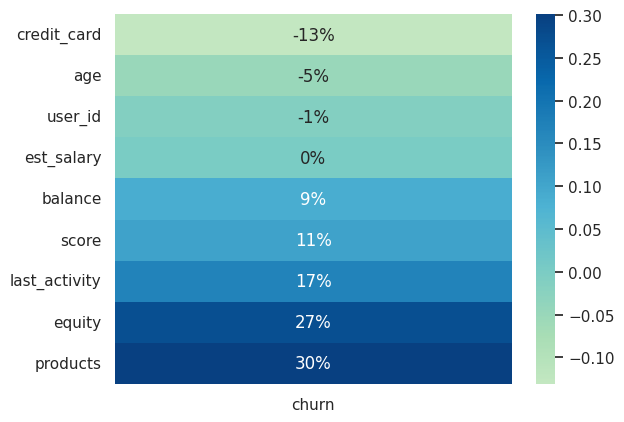

In [112]:
#построим теповую карту зависимости всех параметров от churn
sns.heatmap(data_corr.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True,cmap='GnBu', fmt=".0%", center=0)
plt.show()

*Мы видим достаточно сильную приямую зависимость churn от того , сколькими продуктами банка пользуется клиент и от количества собственности. Обратная же зависимость не такая выраженная, отсутствие кредитной карты связано с уходом клиентов, при этом коэффициент корреляции всего 13%.*

**Выделяем сегменты клиентов по двум или трем отточным признакам и формируем компактные высокоотточные сегменты.**
<a id="segments"></a>

In [134]:
#первый сегмент
data_1seg = data.query(
    (
        "products.between(@products_churn_1min, @products_churn_1max) "
        "and equity.between(@equity_churn_1min, @equity_churn_1max) "
        "and last_activity == @activity_churn_1 "
        "and credit_card == @card_churn_1"
    )
)

data_1seg.head(2)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
6,177259,807.00,Ярославль,Ж,39.00,3,"405,042.44",3,0,1,"103,838.32",0


*В первом сегменте мы собрали клиентов по высокоотточным значениям параметров:количества продуктов в банке, баллов собственности, активности и отсутствие кредитной карты. Получили выботку из 1157 клиентов.*

In [135]:
#второй сегмент
data_2seg = data.query(
    "(score.between(@score_churn_1min, @score_churn_1max) "
    "or score.between(@score_churn_2min, @score_churn_2max)) "

    "and (city == @city_churn_1 or city == @city_churn_2) "

    "and (age.between(@age_churn_1min, @age_churn_1max) "
    "or age.between(@age_churn_2min, @age_churn_2max)) "

    "and (est_salary.between(@salary_churn_1min, @salary_churn_1max) "
    "or est_salary.between(@salary_churn_2min, @salary_churn_2max))"
)

data_2seg.head(2)


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
12,132970,845.00,Ярославль,Ж,31.00,3,"591,928.52",2,1,1,"112,697.16",1


*Во втором сегменте мы собрали клиентов по высокоотточным значениям параметров: баллы кредитного скоринга, города проживания, заработной платы и возраста. Получили группу из 850 клиентов.*

In [136]:
#третий сегмент
data_3seg = data.query(
    "gender == @gender_churn_1 "
    "and (balance.between(@balance_churn_1min, @balance_churn_1max) "
    "or balance.between(@balance_churn_2min, @balance_churn_2max) "
    "or balance.between(@balance_churn_3min, @balance_churn_3max))"
)

data_3seg.head(2)


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8,211686,923.00,Ярославль,М,54.00,5,"1,206,337.87",2,1,0,"155,371.79",0
15,120260,731.00,Рыбинск,М,42.00,3,"1,480,548.47",3,1,0,"160,974.43",0


*В третьем сегменте мы собрали клиентов по высокоотточным значениям параметров:пол и баланс на счете. Получили группу из 959 клиентов.*

**Сравним портреты клиентов, склонных к уходу.**
<a id="portrait"></a>

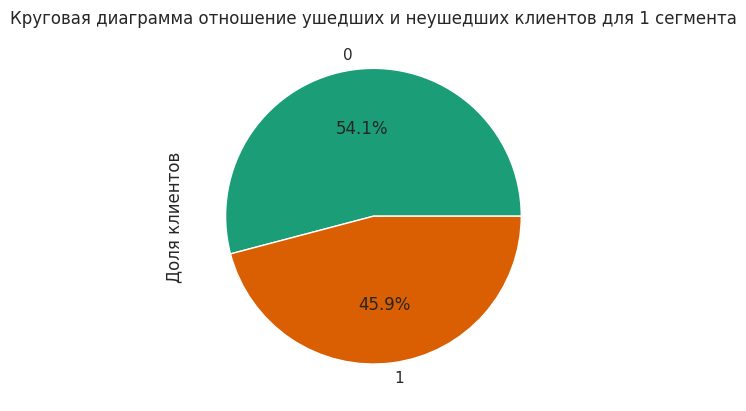

In [116]:
#отток клиентов для 1 сегмента
seg1_churn = data_1seg.groupby('churn')['user_id'].count().reset_index().sort_values(by= 'user_id', ascending=False)

seg1_churn['user_id'].plot.pie(labels=seg1_churn['churn'], autopct='%1.1f%%')
plt.title('Круговая диаграмма отношение ушедших и неушедших клиентов для 1 сегмента')
plt.ylabel('Доля клиентов')
plt.show()

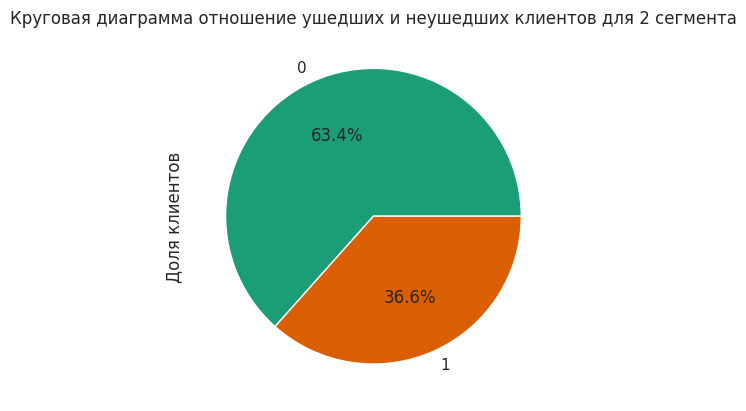

In [117]:
#отток клиентов для 2 сегмента
seg2_churn = data_2seg.groupby('churn')['user_id'].count().reset_index().sort_values(by= 'user_id', ascending=False)

seg2_churn['user_id'].plot.pie(labels=seg2_churn['churn'], autopct='%1.1f%%')
plt.title('Круговая диаграмма отношение ушедших и неушедших клиентов для 2 сегмента')
plt.ylabel('Доля клиентов')
plt.show()

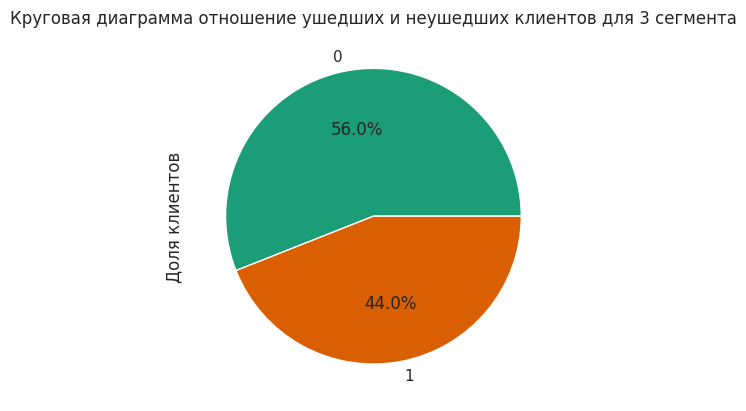

In [118]:
#отток клиентов для 3 сегмента
seg3_churn = data_3seg.groupby('churn')['user_id'].count().reset_index().sort_values(by= 'user_id', ascending=False)

seg3_churn['user_id'].plot.pie(labels=seg3_churn['churn'], autopct='%1.1f%%')
plt.title('Круговая диаграмма отношение ушедших и неушедших клиентов для 3 сегмента')
plt.ylabel('Доля клиентов')
plt.show()

*Мы получили три сегмента клиентов с количеством отточных клиентов значительно превышающих средний банковский показатель 18%.*

In [119]:
# посчитаем мндианные значения параметров по сегментам
summary_1 = data_1seg.median(numeric_only=True).drop('user_id')
summary_2 = data_2seg.median(numeric_only=True).drop('user_id')
summary_3 = data_3seg.median(numeric_only=True).drop('user_id')


summary_df = pd.DataFrame({"Сегмент 1": summary_1, "Сегмент 2": summary_2, "Сегмент 3": summary_3})
display(summary_df)




,Сегмент 1,Сегмент 2,Сегмент 3
score,858.00,880.00,867.00
age,42.00,34.00,41.00
equity,4.00,3.00,4.00
balance,"777,353.73","739,058.25","1,182,760.28"
products,2.00,2.00,2.00
credit_card,0.00,1.00,1.00
last_activity,1.00,0.50,1.00
est_salary,"114,384.63","123,679.20","136,285.02"
churn,0.00,0.00,0.00


In [120]:
#найдем самое часто встречающееся значение для нечисловых значений
summary_1 = data_1seg.select_dtypes(include=['object']).mode().iloc[0]
summary_2 = data_2seg.select_dtypes(include=['object']).mode().iloc[0]
summary_3 = data_3seg.select_dtypes(include=['object']).mode().iloc[0]

# Объединим результаты в один DataFrame
summary_df = pd.DataFrame({"Сегмент 1": summary_1, "Сегмент 2": summary_2, "Сегмент 3": summary_3})

# Отобразим
display(summary_df)



,Сегмент 1,Сегмент 2,Сегмент 3
city,Ярославль,Ярославль,Ярославль
gender,Ж,М,М


*Опишем все схожие характеристики для трех сегментов:*
- score имеют значение от 585 до 880
- equity 3 или 4
- products у всех 2
- last_activity	 клиенты активны
- est_salary в промежутке от 114 до 136
- city Ярославль


*Опишем различия:*
- age в 1 и 3 сегменте 41 и 42, во втором отфильтрованном 34
- balance в 3 сегменте баланс на счете значительно выше он фильтровался по этому параметру
- credit_card нет только в отфильтрованном 1 сегменте
- gender только в 1 сегменте женщины


## Проведем статистическое исследование:
<a id="statistic"></a>

**Сформулируем и проверим гипотезы влияния конкретных факторов на отток клиентов методом статистического анализа.**
<a id="hypotheses"></a>

H0 - Нет различий в доходe между теми клиентами, которые ушли и теми, которые остались

H1 - Есть различия в доходе между теми клиентами, которые ушли и теми, которые остались

In [121]:
#проверим распределение дохода клиентов на нормальность, применим  критерий Шапиро-Уилка
data_shapiro = data['est_salary']

sampled_salary = data['est_salary'].sample(n=1000, replace=True, random_state=42)

alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(sampled_salary) #выбираем 1000 значений из выборки
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print(f'p-значение: {p_value:.10e}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение: 1.3594140567e-42
Отвергаем нулевую гипотезу: распределение не нормально


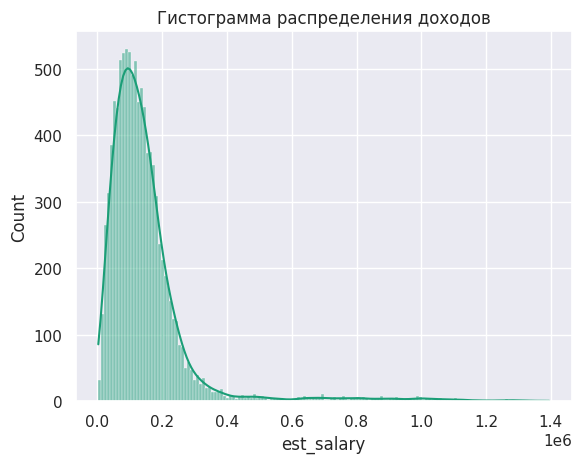

In [122]:
#нарисуем гистограмму расперделения
sns.histplot(data_shapiro, kde=True)
plt.title("Гистограмма распределения доходов")
plt.show()

*В результате вычислений, мы выяснили, что наше распределение не нормально, оно имеет колокообразную структуру сильно смещенную вправо, что характерно для данных о даходах. Применим статистический тест  Манна-Уитни.*

In [123]:
#выделим датасеты с ушедшими и оставшимися клиентами
data_churn1 = data.query("churn == 1 ")['est_salary']
data_churn0 = data.query("churn == 0 ")['est_salary']

results = stats.mannwhitneyu(data_churn1, data_churn0, alternative='two-sided')

print(f'p-значение: {results.pvalue:.5f}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Есть различия в доходах между ушедшими и оставшимися клиентами')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Нет значимых различий в доходах между группами')

p-значение: 0.00024
Отвергаем нулевую гипотезу: Есть различия в доходах между ушедшими и оставшимися клиентами


*Мы обнаружили статистически значимые различия в доходах между ушедшими и оставшимися клиентами.*

H0 - Нет различий в возрасте между теми клиентами, которые ушли и теми, которые остались

H1 - Есть различия в возрасте между теми клиентами, которые ушли и теми, которые остались

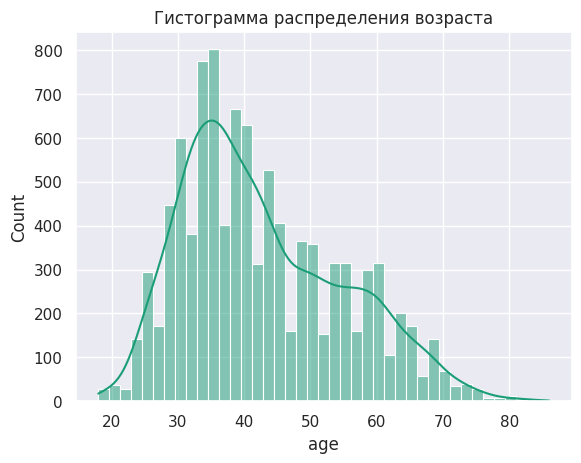

In [124]:
#нарисуем гистограмму расперделения
data_shapiro = data['age']

sns.histplot(data_shapiro, kde=True)
plt.title("Гистограмма распределения возраста")
plt.show()

In [125]:
# проверим распределение на нормальность
sampled_age = data['age'].sample(n=1000, replace=True, random_state=42)


results = stats.shapiro(sampled_age)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print(f'p-значение: {p_value:.10e}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение: nan
Не получилось отвергнуть нулевую гипотезу, всё нормально


*В результате вычислений, мы выяснили, что наше распределение нормально, оно имеет колокообразную структуру с небольшим колоколом справа, что характерно для данных о возрасте. Применим статистический т-тест Стьюдента тест .*

In [126]:
#выделим датасеты с ушедшими и оставшимися клиентами
data = data.dropna(subset = ['age']) #удалим NAN из набора данных

data_churn1 = data.query("churn == 1 ")['age']
data_churn0 = data.query("churn == 0 ")['age']

print(f'среднее выборки ушедших: {np.mean(data_churn1)}')
print(f'среднее выборки оставшихся: {np.mean(data_churn0)}')

results = stats.ttest_ind(data_churn1, data_churn0)

print('p-значение:', results.pvalue)

if results.pvalue < alpha: # проверяем гипотезы
    print('Отвергаем нулевую гипотезу: Есть различия в возрасте между ушедшими и оставшимися клиентами')
else:
    print('Не получилось отвергнуть нулевую гипотезу ')


среднее выборки ушедших: 41.450247388675095
среднее выборки оставшихся: 43.02084610668302
p-значение: 6.503036883995611e-07
Отвергаем нулевую гипотезу: Есть различия в возрасте между ушедшими и оставшимися клиентами


*Мы обнаружили статистически значимые различия в возрасте между ушедшими и оставшимися клиентами.*

H0 - Нет различий в баллах кредитного скоринга между теми клиентами, которые ушли и теми, которые остались

H1 - Есть различия в баллах кредитного скоринга  между теми клиентами, которые ушли и теми, которые остались

In [127]:
#проверим распределение score клиентов на нормальность, применим  критерий Шапиро-Уилка
data_shapiro = data['score']

sampled_score = data['score'].sample(n=1000, replace=True, random_state=42)

results = stats.shapiro(sampled_score) #выбираем 1000 значений из выборки
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print(f'p-значение: {p_value:.10e}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение: 1.0175067524e-06
Отвергаем нулевую гипотезу: распределение не нормально


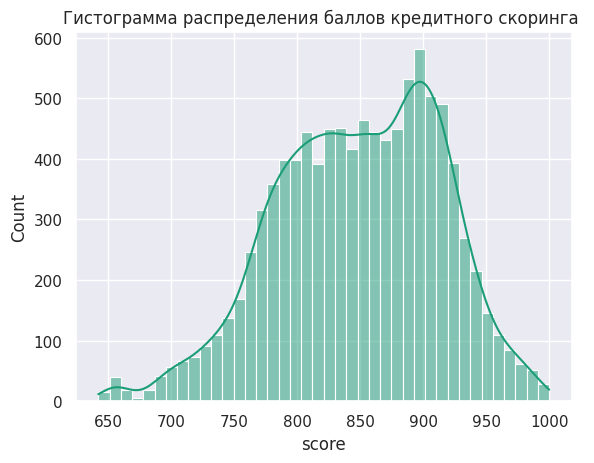

In [128]:
#нарисуем гистограмму расперделения
sns.histplot(data_shapiro, kde=True)
plt.title("Гистограмма распределения баллов кредитного скоринга ")
plt.show()

*В результате вычислений, мы выяснили, что наше распределение не нормально. Применим статистический тест Манна-Уитни.*

In [129]:
#выделим датасеты с ушедшими и оставшимися клиентами
data_churn1 = data.query("churn == 1 ")['score']
data_churn0 = data.query("churn == 0 ")['score']

results = stats.mannwhitneyu(data_churn1, data_churn0, alternative='two-sided')

print(f'p-значение: {results.pvalue:.5f}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Есть различия в score между ушедшими и оставшимися клиентами')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Нет значимых различий в score между группами')

p-значение: 0.00000
Отвергаем нулевую гипотезу: Есть различия в score между ушедшими и оставшимися клиентами


*Мы обнаружили статистически значимые различия в баллоx кредитного скоринга между ушедшими и оставшимися клиентами.*

H0 - Нет различий в балансе на счету между теми клиентами, которые ушли и теми, которые остались

H1 - Есть различия в балансе на счету между теми клиентами, которые ушли и теми, которые остались

In [130]:
#проверим распределение дохода клиентов на нормальность, применим  критерий Шапиро-Уилка
data = data.dropna(subset = ['balance']) #удалим NAN из набора данных

data_shapiro = data['balance']

sampled_balance = data['balance'].sample(n=1000, replace=True, random_state=42)

results = stats.shapiro(sampled_balance) #выбираем 1000 значений из выборки
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print(f'p-значение: {p_value:.10e}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение: 1.3610060378e-48
Отвергаем нулевую гипотезу: распределение не нормально


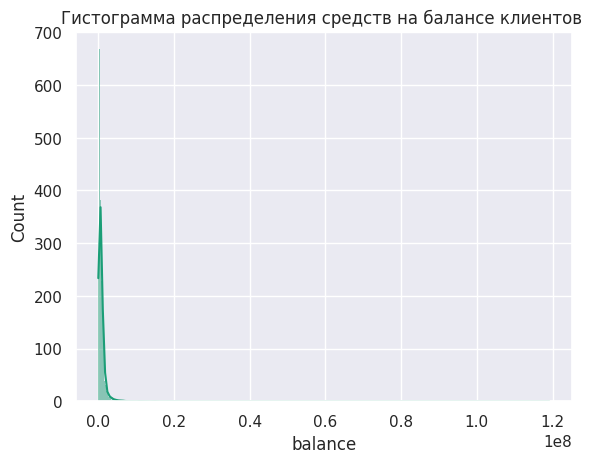

In [131]:
#нарисуем гистограмму расперделения
sns.histplot(data_shapiro, kde=True)
plt.title("Гистограмма распределения средств на балансе клиентов ")
plt.show()

*В результате вычислений, мы выяснили, что наше распределение не нормально, оно имеет колокообразную структуру сильно смещенную вправо, что характерно для данных о балансе. Применим статистический тест  Манна-Уитни.*

In [132]:
#выделим датасеты с ушедшими и оставшимися клиентами
data_churn1 = data.query("churn == 1 ")['balance']
data_churn0 = data.query("churn == 0 ")['balance']

results = stats.mannwhitneyu(data_churn1, data_churn0, alternative='two-sided')

print(f'p-значение: {results.pvalue:.5f}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Есть различия в балансе между ушедшими и оставшимися клиентами')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Нет значимых различий в балансе между группами')

p-значение: 0.00000
Отвергаем нулевую гипотезу: Есть различия в балансе между ушедшими и оставшимися клиентами


*Мы обнаружили статистически значимые отличия в балансе между ушедшими и оставшимися клиентами.*

**Сделаем вывод о том, какие показатели оказывают статистически значимое влияние на отток клиентов.**
<a id="stat"></a>

Мы провели статистические тесты, в результате которых мы вычислили, что у группы ушедших клиентов имелись значимые отличия от группы оставшихся в банке. Отличия обнаружены в балансе на счете, баллах кредитного скоринга, возрасте, заработной плате.

## Общий вывод:
<a id="intermediate"></a>

**Объединим признаки отточности и сформируем сегменты:**
<a id="signs"></a>

На основе проведенных исследований можем сфрмулировать три основных отточных сегмента клиентов банка:
    
1. Женщины, проживающие в Ярославле. Среднего возраста(42), состоятельные. Высокий баланс и достаточно высокая заработная плата. Имеет несколько объектов недвижимости. Имеет два продукта банка, кредитной карты нет. Клиент активный.

2. Мужчины, проживающие в Ярославле. Молодые (34), состоятельные. Высокий баланс и достаточно высокая заработная плата. Имеет несколько объектов недвижимости. Имеет два продукта банка, кредитная карта есть. Клиент активный.

3. Мужчины, проживающие в Ярославле. Среднего возраста (41), состоятельные. Высокий баланс и достаточно высокая заработная плата. Имеет несколько объектов недвижимости. Имеет два продукта банка, кредитная карта есть. Клиент активный.

**Дадим рекомендации отделу маркетинга для уменьшения оттока клиентов.**
<a id="recomendation"></a>

На основе выявленных отточных сегментов клиентов, отделу маркетинга банка можно предложить следующие стратегии по удержанию клиентов и снижению оттока:

*1 Сегмент* Женщины, проживающие в Ярославле (42 года, высокий баланс, нет кредитной карты)
 Цель: Удержание через программы лояльности и инвестиционные продукты.
-  Продвижение премиальных дебетовых карт.
-  Предложение дополнительных продуктов (инвестиционные портфели, пенсионные планы).
-  Специальные предложения на ипотеку и страхование недвижимости.

*2 Сегмент* Мужчины, проживающие в Ярославле (34 года, высокий баланс, есть кредитная карта)
 Цель: Увеличение использования кредитных продуктов.
- Дополнительные бонусы для активных пользователей карт.
- Продвижение ипотечных и автокредитных программ.
- Предолжение персональных кредитов.

*3 Сегмент* Мужчины, проживающие в Ярославле (41 год, высокий баланс, есть кредитная карта)
 Цель: Удержание через инвестиционные и премиальные предложения.
- Развитие эксклюзивного обслуживания для состоятельных клиентов.
- Участие в инвестиционных продуктах с персональным менеджером (облигации, акции, ETF).
- Персональные условия на страхование.

## Ссылка на презентацию.
<a id="presentation"></a>

* [Презентация.](https://disk.yandex.ru/i/5_G8rjOG6m0cTA)